In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm

In [5]:
houseprice.head(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [6]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [7]:
houseprice.isnull().sum()*100/houseprice.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [8]:
# drop the columns with high percentage of missing values
houseprice = houseprice.drop(['alley','fireplacequ','poolqc','fence','miscfeature'], axis=1)

In [9]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non

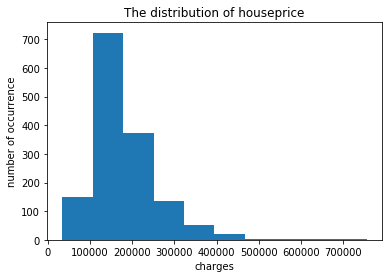

In [10]:
plt.hist(houseprice['saleprice'])
plt.title("The distribution of houseprice")
plt.xlabel("charges")
plt.ylabel("number of occurrence")
plt.show()

In [11]:
cat_hp=houseprice.select_dtypes(include='object')
print(cat_hp)

     mszoning street lotshape landcontour utilities lotconfig landslope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     

In [12]:
cat_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
mszoning         1460 non-null object
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
masvnrtype       1452 non-null object
exterqual        1460 non-null object
extercond        1460 non-null object
foundation       1460 non-null object
bsmtqual         1423 non-null object
bsmtcond         1423 non-null object
bsmtexposure     1422 non-null object
bsmtfintype1     14

In [13]:
# Question??? numerical variables can be categorical not continious, what to do???
num_df = houseprice.select_dtypes(include=[np.number])


#con_hp1=houseprice.select_dtypes(include='int64')
#con_hp2=houseprice.select_dtypes(include='float64')
#con_hp=pd.concat([con_hp1, con_hp2])

In [14]:
print(num_df.head(10))

   id  mssubclass  lotfrontage  lotarea  overallqual  overallcond  yearbuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   yearremodadd  masvnrarea  bsmtfinsf1  ...  wooddecksf  openporchsf  \
0          2003       196.0         706  ...  

In [15]:
num_df=num_df.drop(columns=['saleprice'])

In [16]:
# check numerical variables missing values

num_df.isnull().sum()*100/num_df.isnull().count()

id                0.000000
mssubclass        0.000000
lotfrontage      17.739726
lotarea           0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
masvnrarea        0.547945
bsmtfinsf1        0.000000
bsmtfinsf2        0.000000
bsmtunfsf         0.000000
totalbsmtsf       0.000000
firstflrsf        0.000000
secondflrsf       0.000000
lowqualfinsf      0.000000
grlivarea         0.000000
bsmtfullbath      0.000000
bsmthalfbath      0.000000
fullbath          0.000000
halfbath          0.000000
bedroomabvgr      0.000000
kitchenabvgr      0.000000
totrmsabvgrd      0.000000
fireplaces        0.000000
garageyrblt       5.547945
garagecars        0.000000
garagearea        0.000000
wooddecksf        0.000000
openporchsf       0.000000
enclosedporch     0.000000
threessnporch     0.000000
screenporch       0.000000
poolarea          0.000000
miscval           0.000000
mosold            0.000000
yrsold            0.000000
d

In [17]:
# fill-in missing values for numeric variables
num_df['lotfrontage'] = num_df['lotfrontage'].fillna(num_df['lotfrontage'].value_counts().idxmax())
num_df['masvnrarea'] = num_df['lotfrontage'].fillna(num_df['lotfrontage'].value_counts().idxmax())
num_df['garageyrblt'] = num_df['garageyrblt'].fillna(num_df['garageyrblt'].value_counts().idxmax())

In [18]:
num_df.isnull().sum()*100/num_df.isnull().count()

id               0.0
mssubclass       0.0
lotfrontage      0.0
lotarea          0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
masvnrarea       0.0
bsmtfinsf1       0.0
bsmtfinsf2       0.0
bsmtunfsf        0.0
totalbsmtsf      0.0
firstflrsf       0.0
secondflrsf      0.0
lowqualfinsf     0.0
grlivarea        0.0
bsmtfullbath     0.0
bsmthalfbath     0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
kitchenabvgr     0.0
totrmsabvgrd     0.0
fireplaces       0.0
garageyrblt      0.0
garagecars       0.0
garagearea       0.0
wooddecksf       0.0
openporchsf      0.0
enclosedporch    0.0
threessnporch    0.0
screenporch      0.0
poolarea         0.0
miscval          0.0
mosold           0.0
yrsold           0.0
dtype: float64

In [19]:
column_list=list(cat_hp.columns) 
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition']


In [20]:
num_column_list=list(num_df.columns) 
print(num_column_list)

['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


In [21]:
cat_hp.isnull().sum()*100/cat_hp.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.068493
kitchenqual      0.000000
functional       0.000000
garagetype       5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
dtype: float

In [22]:
print(len(cat_hp))

1460


In [23]:
houseprice["saleprice"].isnull().sum()*100/houseprice["saleprice"].isnull().count()

0.0

In [24]:
# append the target variable to cat_hp
#cat_hp_all=pd.concat([cat_hp, houseprice['saleprice']])

cat_hp_all=cat_hp.join(houseprice['saleprice'])
print(cat_hp_all)

     mszoning street lotshape landcontour utilities lotconfig landslope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     

In [25]:
column_list=list(cat_hp_all.columns) 
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition', 'saleprice']


In [26]:
cat_hp_all.isnull().sum()*100/cat_hp_all.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.068493
kitchenqual      0.000000
functional       0.000000
garagetype       5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
saleprice   

In [27]:
print(len(column_list))

39


In [28]:
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition', 'saleprice']


In [29]:
# fill-in missing value for categorical variables

for column in column_list:
    for i in range(0, len(cat_hp_all)):
        if pd.isnull(cat_hp_all[column][i]):
            cat_hp_all[column][i] = cat_hp_all.fillna(cat_hp_all[column].value_counts().index[0],inplace=True)
            

                
        
#for i in range(0, len(cat_hp_all)):
   # for column in column_list:   
        #if pd.isnull(cat_hp_all[column][i]):
            #cat_hp_all[column][i] = cat_hp_all[column][i-1]
        


In [30]:
#print(cat_hp_all[column].value_counts())

In [31]:
cat_hp_all.isnull().sum()*100/cat_hp_all.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.068493
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         0.000000
bsmtcond         0.000000
bsmtexposure     0.000000
bsmtfintype1     0.000000
bsmtfintype2     0.000000
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.000000
kitchenqual      0.000000
functional       0.000000
garagetype       0.000000
garagefinish     0.000000
garagequal       0.000000
garagecond       0.000000
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
saleprice   

In [32]:
cat_hp_all['masvnrtype'].value_counts(dropna=False)

None       871
BrkFace    445
Stone      128
BrkCmn      15
NaN          1
Name: masvnrtype, dtype: int64

In [33]:
#print(cat_hp_all['masvnrtype'])

In [34]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
list(cat_hp_all.columns.values)

['mszoning',
 'street',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype',
 'salecondition',
 'saleprice']

In [37]:
# t_test or anova on the visual

In [38]:
import statsmodels.api as sm

In [39]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [40]:
len(column_list)

39

In [41]:
# convert variables into binary

#convert_list=convert_list.values.tolist()
#le = preprocessing.LabelEncoder()
#le.fit(convert_list)
new_column_list=column_list[0:37]

for col in new_column_list:
    cat_hp_all[col]=pd.get_dummies(cat_hp_all[col],drop_first=True)
    print(cat_hp_all.head(20))

    mszoning street lotshape landcontour utilities lotconfig landslope  \
0          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          0   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          0   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          0   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          0   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          0   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         0   Pave      IR2         L

    mszoning  street  lotshape  landcontour  utilities lotconfig landslope  \
0          0       1         0            0          0    Inside       Gtl   
1          0       1         0            0          0       FR2       Gtl   
2          0       1         0            0          0    Inside       Gtl   
3          0       1         0            0          0    Corner       Gtl   
4          0       1         0            0          0       FR2       Gtl   
5          0       1         0            0          0    Inside       Gtl   
6          0       1         0            0          0    Inside       Gtl   
7          0       1         0            0          0    Corner       Gtl   
8          0       1         0            0          0    Inside       Gtl   
9          0       1         0            0          0    Corner       Gtl   
10         0       1         0            0          0    Inside       Gtl   
11         0       1         0            0          0    Inside

    mszoning  street  lotshape  landcontour  utilities  lotconfig  landslope  \
0          0       1         0            0          0          0          0   
1          0       1         0            0          0          0          0   
2          0       1         0            0          0          0          0   
3          0       1         0            0          0          0          0   
4          0       1         0            0          0          0          0   
5          0       1         0            0          0          0          0   
6          0       1         0            0          0          0          0   
7          0       1         0            0          0          0          0   
8          0       1         0            0          0          0          0   
9          0       1         0            0          0          0          0   
10         0       1         0            0          0          0          0   
11         0       1         0          

    mszoning  street  lotshape  landcontour  utilities  lotconfig  landslope  \
0          0       1         0            0          0          0          0   
1          0       1         0            0          0          0          0   
2          0       1         0            0          0          0          0   
3          0       1         0            0          0          0          0   
4          0       1         0            0          0          0          0   
5          0       1         0            0          0          0          0   
6          0       1         0            0          0          0          0   
7          0       1         0            0          0          0          0   
8          0       1         0            0          0          0          0   
9          0       1         0            0          0          0          0   
10         0       1         0            0          0          0          0   
11         0       1         0          

In [42]:
# linear model OLS

# Y is the target variable
Y = cat_hp_all['saleprice']
X=np.concatenate((cat_hp_all.iloc[:,0:37],num_df),axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())


The number of observations in the training set is 1168
The number of observations in the test set is 292
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     78.34
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:51:31   Log-Likelihood:                -13779.
No. Observations:                1168   AIC:                         2.770e+04
Df Residuals:                    1097   BIC:                         2.806e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

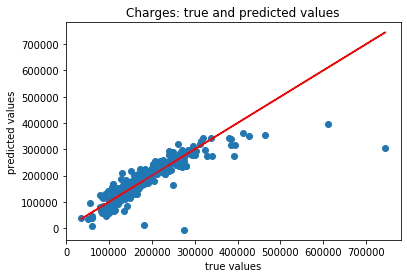

Mean absolute error of the prediction is: 23353.457587078025
Mean squared error of the prediction is: 1917904835.1876447
Root mean squared error of the prediction is: 43793.89038653274
Mean absolute percentage error of the prediction is: 13.301067581066317


In [43]:
# predict

X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [48]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# We are making predictions here
y_preds_train = results.predict(X_train)
y_preds_test = results.predict(X_test)



In [54]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
r_squared_train = coefficient_of_determination(y_train,y_preds_train)
print(r_squared_train)# this is r-squred for training data

r_squared_test = coefficient_of_determination(y_test,y_preds_test)
print(r_squared_test)
print('')
# so according to the two r-squared scores,one is 0.833, another one is 0.713, there is a little bit difference
# does this count as overfitting on train model?? or not??

# question???
#print("R-squared of the model in the training set is: {}".format(y_preds_train.rsquared(X_train, y_train)))
#print("-----Test set statistics-----")
#??? question on this 
#print("R-squared of the model in the test set is: {}".format(y_preds_test.rsquared(X_test, y_test)))

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))


0.8332967401333337
0.7143298524035718

Mean absolute error of the prediction is: 23353.457587078025
Mean squared error of the prediction is: 1917904835.1876447
Root mean squared error of the prediction is: 43793.89038653274
Mean absolute percentage error of the prediction is: 13.301067581066317


In [56]:
from sklearn.model_selection import KFold # import KFold

In [57]:
# cross validation on OLS model

kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

KFold(n_splits=5, random_state=None, shuffle=False)


KFold(n_splits=5, random_state=None, shuffle=False)

In [62]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = Y[train_index], Y[test_index]
 X_train = sm.add_constant(X_train)
 results = sm.OLS(y_train, X_train).fit()
 print(results.summary())
 X_test = sm.add_constant(X_test)
 y_preds = results.predict(X_test)   



TRAIN: [ 292  293  294 ... 1457 1458 1459] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

strong multicollinearity problems or that the design matrix is singular.
TRAIN: [   0    1    2 ... 1457 1458 1459] TEST: [584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601
 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619
 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637
 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655
 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673
 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691
 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709
 710 711 712 713 714 715 716 717 718 719 720 721 722 723 724 725 726 727
 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745
 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763
 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781
 782 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797 798 799
 8

TRAIN: [   0    1    2 ... 1165 1166 1167] TEST: [1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181
 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195
 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209
 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223
 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237
 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251
 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265
 1266 1267 1268 1269 1270 1271 1272 1273 1274 1275 1276 1277 1278 1279
 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293
 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307
 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321
 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335
 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349
 1350 1351 1352 1353 1354 13

In [ ]:
# from the results above, 5 times of cross-validation 5 r-squared and adjust r-squared scores, it seems the model is good, 
# because r-squared scores are consistent across 5 models here

In [74]:
# cross validation on Ridge regression
from sklearn.linear_model import Ridge

Y = cat_hp_all['saleprice']
X = np.concatenate((cat_hp_all.iloc[:,0:37],num_df),axis=1) 
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 print('')
 x_train, x_test = X[train_index], X[test_index]
 y_train, y_test = Y[train_index], Y[test_index]
 ridgemodel=Ridge(alpha=10**3)
 ridgemodel.fit(x_train,y_train)

 X_preds_train = ridgemodel.predict(x_train)
 y_preds_test = ridgemodel.predict(x_test)   
 print("R-squared of the model on the training set is: {}".format(ridgemodel.score(x_train, y_train)))
 print("-----Test set statistics-----")
 print("R-squared of the model on the test set is: {}".format(ridgemodel.score(x_test, y_test)))
 print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
 print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
 print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
 print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


TRAIN: [ 292  293  294 ... 1457 1458 1459] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [ ]:
# from Ridge model results above, it's clear to see, Ridge model training model r-squared is smaller than testing model r-squared score,
# which means this ridge model is underfitting??? Question
# and the last fold model result is not consistent with first 4 fold results, training model r-squared is 0.832, and
# testing model r-squared is 0.592, which means this ridge model might be overfitting

In [76]:
#Lasso model cross validation model

from sklearn.linear_model import Lasso

Y = cat_hp_all['saleprice']
X = np.concatenate((cat_hp_all.iloc[:,0:37],num_df),axis=1) 
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 print('')
 x_train, x_test = X[train_index], X[test_index]
 y_train, y_test = Y[train_index], Y[test_index]
 lassoregr=Lasso(alpha=10**15)
 lassoregr.fit(x_train,y_train)

 X_preds_train = lassoregr.predict(x_train)
 y_preds_test = lassoregr.predict(x_test)   
 print("R-squared of the model on the training set is: {}".format(lassoregr.score(x_train, y_train)))
 print("-----Test set statistics-----")
 print("R-squared of the model on the test set is: {}".format(lassoregr.score(x_test, y_test)))
 print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
 print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
 print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
 print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))




TRAIN: [ 292  293  294 ... 1457 1458 1459] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [ ]:
# this lasso regression model results preform poorly, training model r-squared are 0, and testing model r-squared are negative vales
# lassor regression doesn't fit for this data

In [79]:
from sklearn.linear_model import ElasticNet

Y = cat_hp_all['saleprice']
X = np.concatenate((cat_hp_all.iloc[:,0:37],num_df),axis=1) 
kf = KFold(n_splits=5) # Define the split - into 5 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 
KFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 print('')
 x_train, x_test = X[train_index], X[test_index]
 y_train, y_test = Y[train_index], Y[test_index]
 elasticmodel=ElasticNet(alpha=10**15)
 elasticmodel.fit(x_train,y_train)
 X_preds_train = elasticmodel.predict(x_train)
 y_preds_test = elasticmodel.predict(x_test)   
 print("R-squared of the model on the training set is: {}".format(elasticmodel.score(x_train, y_train)))
 print("-----Test set statistics-----")
 print("R-squared of the model on the test set is: {}".format(elasticmodel.score(x_test, y_test)))
 print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
 print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
 print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
 print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

TRAIN: [ 292  293  294 ... 1457 1458 1459] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [ ]:
# this ElasticNet model performas poorly 

In [ ]:
# conclusion: comparing these four models, OLS, Ridge, Lasso, and ElasticNet
# OLS and Eidge model perform well, delivered decent r-squared scores compaing to other models.